In [77]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (
    r2_score, mean_absolute_error, 
    mean_absolute_percentage_error, 
    mean_squared_error
)

from catboost import CatBoostRegressor


import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
DATA_DIR = '../data/'
df = pd.read_csv(DATA_DIR+'cleaned.csv', low_memory=False)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Columns: 595 entries, FAMINC_IND to HIGHDEG
dtypes: float64(578), int64(13), object(4)
memory usage: 29.7+ MB


In [80]:
labels = df['DEBT_MDN']

In [83]:
# Need to remove all columns with DEBT in them as they are all valid targets which compose our label DEBT_MDN
to_drop = [c for c in df.columns if 'DEBT' in c]
df = df.drop(columns=to_drop) 
len(df.columns)

564

In [84]:
num_cols = set(df.columns[df.dtypes.values == np.dtype('float64')])
cat_cols = set(df.columns[df.dtypes.values == np.dtype('object')]) | set(df.columns[df.dtypes.values == np.dtype('int64')])
cat_indices = [df.columns.get_loc(c) for c in cat_cols if c in df.columns]


In [86]:
print(len(cat_cols))
print(len(num_cols))

17
547


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=1234)


In [88]:
cat_reg = CatBoostRegressor(verbose=0, task_type="GPU") # task_type="GPU"
cat_reg.fit(X_train, y_train, cat_features=cat_indices)


In [91]:
y_pred = cat_reg.predict(X_test)

print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MAPE score: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAE score: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE score: {mean_squared_error(y_test, y_pred)}')


R2 score: 0.8362099714258072
MAPE score: 0.13197809138366734
MAE score: 1281.2101858045448
MSE score: 3673476.927577371


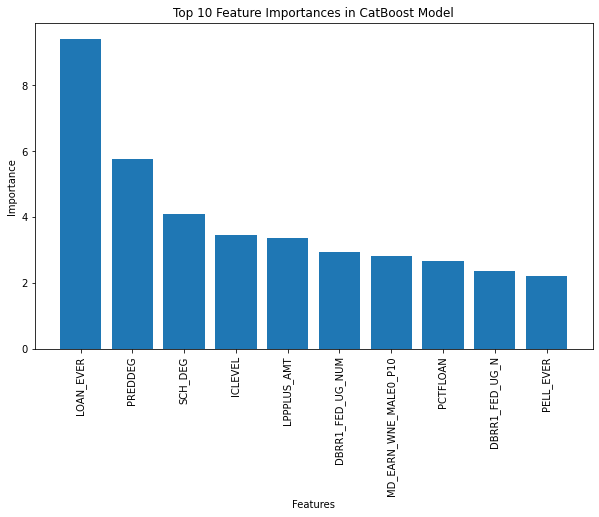

In [92]:
# get feat importances
feature_importances = cat_reg.get_feature_importance()
feature_names = X_train.columns

# Sort the feature importances in descending order and get corresponding feature names
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices][:10]  # Select top 10
sorted_feature_names = feature_names[sorted_indices][:10]  # Select top 10 feature names

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances in CatBoost Model')
plt.show()